In [43]:
#Social_Network_Ads.csv

**Importing the libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score,classification_report,accuracy_score

**Importing the dataset**

In [45]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [46]:
#df=df.drop(columns='User ID')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [47]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

**Splitting the dataset into the Training set and Test set**

In [48]:
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

**Feature Scaling**

In [49]:
scalar=StandardScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [50]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [51]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [52]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.87

In [53]:
auroc=roc_auc_score(y_test,y_pred)
auroc

0.8577863577863579

In [59]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
95,0,0
96,1,1
97,0,0
98,1,1


**Making the Confusion Matrix**

In [55]:
confusion_matrix(y_test,y_pred)

array([[57,  6],
       [ 7, 30]])

**Visualising the Training set results**

[Text(0.5071428571428571, 0.9615384615384616, '[-1.00668904  0.42524797 -0.53927701] <= 0.531\ngini = 0.457\nsamples = 300\nvalue = [194, 106]\nclass = 0'),
 Text(0.2714285714285714, 0.8846153846153846, '[-1.00668904 -0.07860034 -0.27526107] <= 0.677\ngini = 0.314\nsamples = 231\nvalue = [186, 45]\nclass = 0'),
 Text(0.14285714285714285, 0.8076923076923077, '[-1.00668904 -0.07860034 -0.27526107] <= -0.129\ngini = 0.064\nsamples = 182\nvalue = [176, 6]\nclass = 0'),
 Text(0.11428571428571428, 0.7307692307692307, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]\nclass = 0'),
 Text(0.17142857142857143, 0.7307692307692307, '[-1.00668904  0.42524797 -0.53927701] <= 0.355\ngini = 0.161\nsamples = 68\nvalue = [62, 6]\nclass = 0'),
 Text(0.14285714285714285, 0.6538461538461539, '[-1.00668904  0.42524797 -0.53927701] <= 0.033\ngini = 0.138\nsamples = 67\nvalue = [62, 5]\nclass = 0'),
 Text(0.08571428571428572, 0.5769230769230769, '[-1.00668904 -0.07860034 -0.27526107] <= -0.028\ngini = 0.042\nsampl

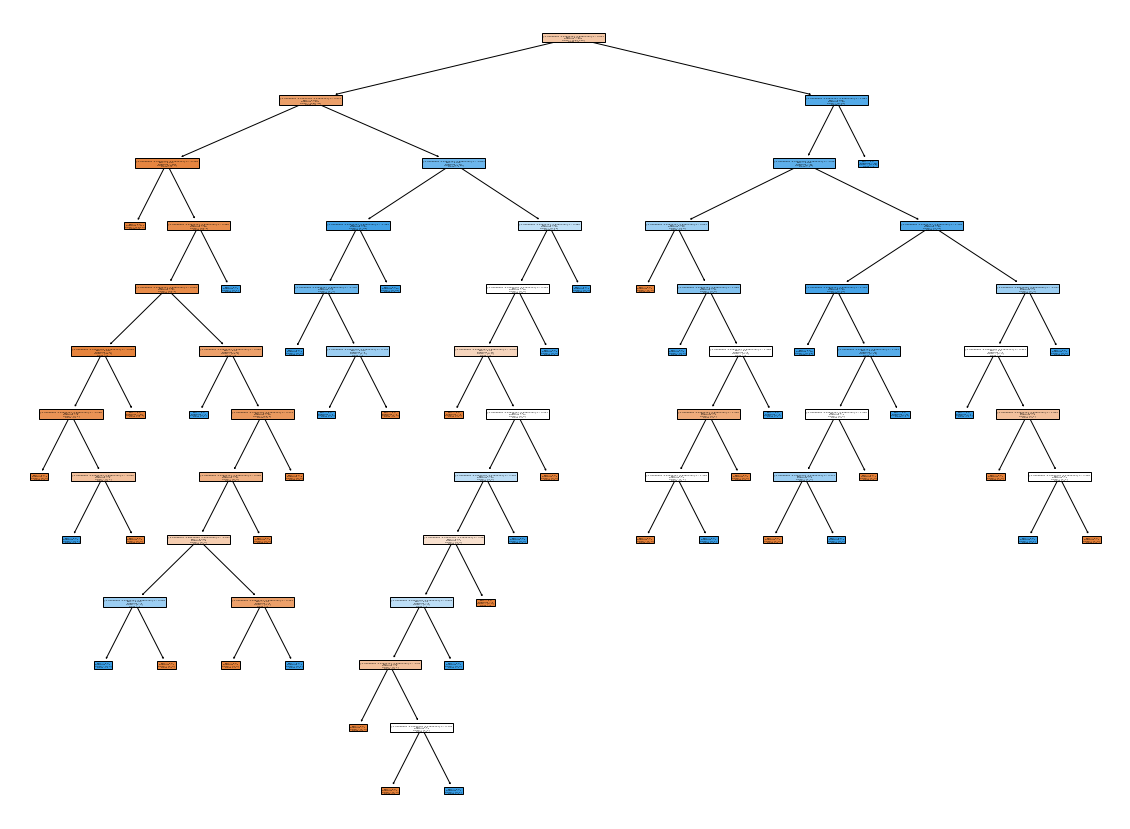

In [56]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt,class_names=['0','1'],feature_names=X_train, filled=True,)

**Visualising the Test set results**

[Text(0.5071428571428571, 0.9615384615384616, '[-1.00668904 -1.99322392 -0.80329295] <= 0.531\ngini = 0.457\nsamples = 300\nvalue = [194, 106]\nclass = 0'),
 Text(0.2714285714285714, 0.8846153846153846, '[ 0.99335541  2.23910189 -0.86196316] <= 0.677\ngini = 0.314\nsamples = 231\nvalue = [186, 45]\nclass = 0'),
 Text(0.14285714285714285, 0.8076923076923077, '[ 0.99335541  2.23910189 -0.86196316] <= -0.129\ngini = 0.064\nsamples = 182\nvalue = [176, 6]\nclass = 0'),
 Text(0.11428571428571428, 0.7307692307692307, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]\nclass = 0'),
 Text(0.17142857142857143, 0.7307692307692307, '[-1.00668904 -1.99322392 -0.80329295] <= 0.355\ngini = 0.161\nsamples = 68\nvalue = [62, 6]\nclass = 0'),
 Text(0.14285714285714285, 0.6538461538461539, '[-1.00668904 -1.99322392 -0.80329295] <= 0.033\ngini = 0.138\nsamples = 67\nvalue = [62, 5]\nclass = 0'),
 Text(0.08571428571428572, 0.5769230769230769, '[ 0.99335541  2.23910189 -0.86196316] <= -0.028\ngini = 0.042\nsampl

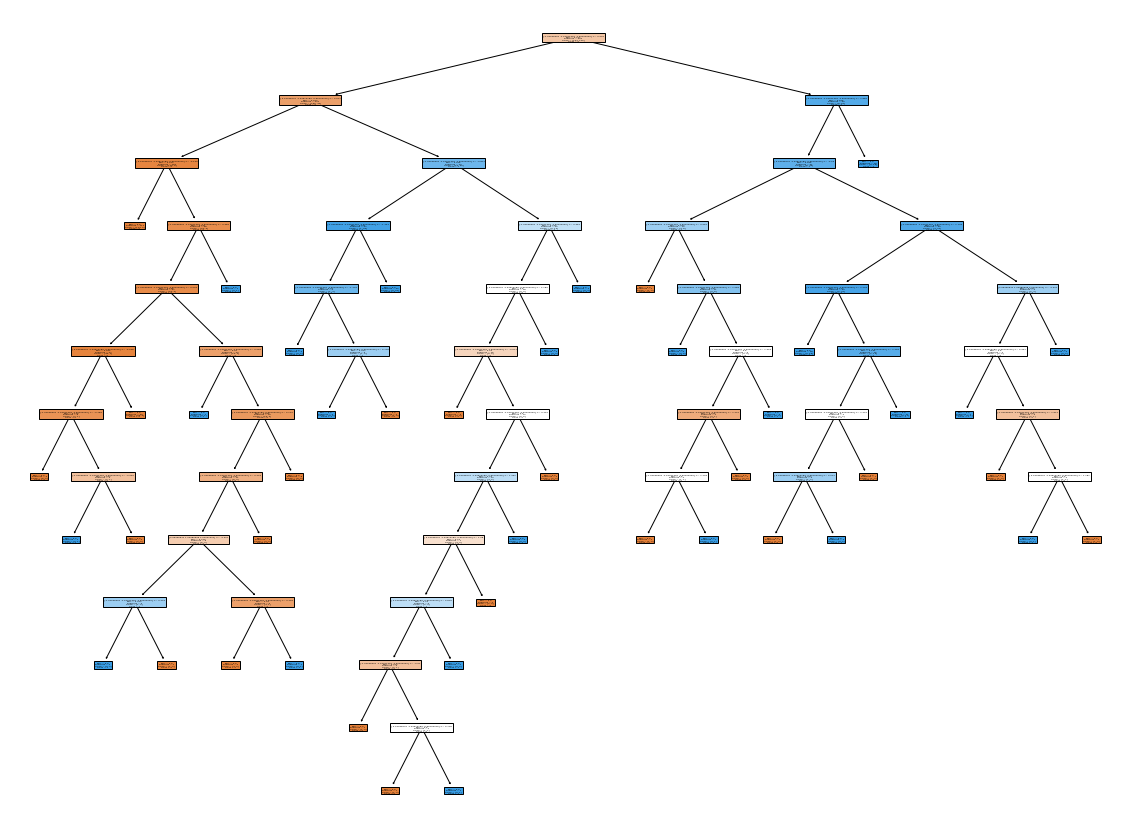

In [57]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt,class_names=['0','1'],feature_names=X_test, filled=True,)

In [58]:
dt.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.